<p align="center">
  <img src="big_four.png">
</p>


# TenisStadistics

## Importamos librerías necesarias

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests, json
import time

## Análisis univariante del primer dataset 
### CSV con los resultados de los partidos del circuito ATP desde el año 2000

In [2]:
df = pd.read_csv(r'C:\Users\jaime\OneDrive\Documentos\Bootcamp\atp_tennis.csv', sep=";")
df.drop(["Odd_1", "Odd_2", "Pts_1", "Pts_2"], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,7-6 5-7 6-4


In [3]:
torneos = ['Grand Slam', "Masters Cup", 'Masters 1000']
df_torneos = df[df["Series"].isin(torneos)]

df_torneos["Sets_Played"] = df_torneos["Score"].str.count("-")
df_torneos["Tie_Breaks"] = df_torneos["Score"].str.count("7-6") + df_torneos["Score"].str.count("6-7")
df_torneos.head()

C:\Users\jaime\AppData\Local\Temp\ipykernel_15676\688363874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_torneos["Sets_Played"] = df_torneos["Score"].str.count("-")
C:\Users\jaime\AppData\Local\Temp\ipykernel_15676\688363874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_torneos["Tie_Breaks"] = df_torneos["Score"].str.count("7-6") + df_torneos["Score"].str.count("6-7")


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Score,Sets_Played,Tie_Breaks
151,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Puerta M.,Agassi A.,Agassi A.,112,1,2-6 2-6 3-6,3,0
152,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Alami K.,Manta L.,Alami K.,35,107,6-4 7-6 7-5,3,1
153,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Alonso J.,Arazi H.,Arazi H.,111,41,3-6 6-7 2-6,3,1
154,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Behrend T.,Meligeni F.,Behrend T.,106,28,6-2 4-6 6-7 6-3 6-0,5,1
155,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Stoltenberg J.,Bjorkman J.,Bjorkman J.,81,76,7-6 4-6 4-6 6-0 4-6,5,1


In [4]:
df_torneos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19206 entries, 151 to 60272
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tournament   19206 non-null  object        
 1   Date         19206 non-null  datetime64[ns]
 2   Series       19206 non-null  object        
 3   Court        19206 non-null  object        
 4   Surface      19206 non-null  object        
 5   Round        19206 non-null  object        
 6   Best of      19206 non-null  int64         
 7   Player_1     19206 non-null  object        
 8   Player_2     19206 non-null  object        
 9   Winner       19206 non-null  object        
 10  Rank_1       19206 non-null  int64         
 11  Rank_2       19206 non-null  int64         
 12  Score        19206 non-null  object        
 13  Sets_Played  19206 non-null  int64         
 14  Tie_Breaks   19206 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 

In [5]:
df_torneos.describe(include="int64").round(2)

,Best of,Rank_1,Rank_2,Sets_Played,Tie_Breaks
count,19206.00,19206.00,19206.00,19206.00,19206.00
mean,4.18,60.01,58.88,3.15,0.53
std,0.98,77.56,74.15,0.94,0.71
min,3.00,1.00,1.00,2.00,0.00
25%,3.00,15.00,15.00,2.00,0.00
50%,5.00,40.00,40.00,3.00,0.00
75%,5.00,79.75,79.00,4.00,1.00
max,5.00,1441.00,1415.00,5.00,4.00


In [6]:
for i in df_torneos.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f}%")

La cardinalidad de la variable Tournament es 0.43%
La cardinalidad de la variable Series es 0.01%
La cardinalidad de la variable Court es 0.00%
La cardinalidad de la variable Surface es 0.01%
La cardinalidad de la variable Round es 0.01%
La cardinalidad de la variable Player_1 es 2.32%
La cardinalidad de la variable Player_2 es 2.32%
La cardinalidad de la variable Winner es 1.79%
La cardinalidad de la variable Score es 11.01%


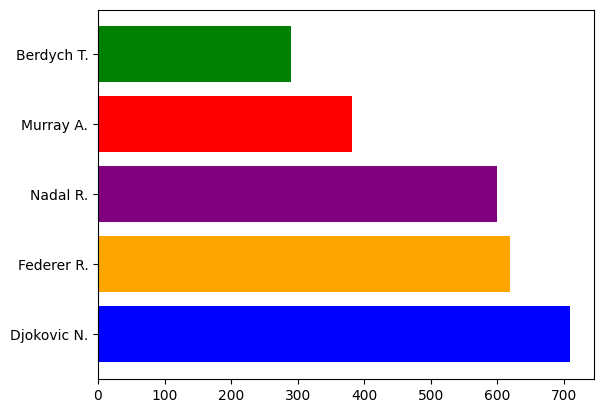

In [7]:
winners = df_torneos.groupby("Winner").count().sort_values("Series", ascending=False).head(5).index
victorias = df_torneos.groupby("Winner").count().sort_values("Series", ascending=False).head(5)["Series"]

color = ['blue', 'orange', 'purple', 'red', 'green']

plt.barh(winners, victorias, color=color)
plt.show()

## Análisis univariante del segundo dataset 
### API que contiene estadísticas de jugadores

In [21]:
url = "https://ultimate-tennis1.p.rapidapi.com/live_leaderboard/50"

headers = {
	"X-RapidAPI-Key": "0b00932e03msh9c0e6292431999cp102f2cjsnfaa91f7ec449",
	"X-RapidAPI-Host": "ultimate-tennis1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

todos = json.loads(response.text)

players = pd.DataFrame(todos["data"]).head(10)

### Cargamos las estadísticas de juego del top 5 de jugadores de la ATP

In [22]:
ids = players[["Name","id"]]

In [56]:
dfStats = pd.DataFrame()

for i in range(len(ids)):
	id = ids.iloc[i]["id"]
	name = ids.iloc[i]["Name"]
	
	print(id, name)
 
	url = (f"https://ultimate-tennis1.p.rapidapi.com/player_stats/atp/{id}/2023/all")

	headers = {
		"X-RapidAPI-Key": "0b00932e03msh9c0e6292431999cp102f2cjsnfaa91f7ec449",
		"X-RapidAPI-Host": "ultimate-tennis1.p.rapidapi.com"
	}

	response = requests.get(url, headers=headers)

	stats = json.loads(response.text)

	data1 = pd.DataFrame(stats["player_data"]).head()
	# print(data1)

	name = pd.DataFrame([name], columns=["Name"])
	conc = pd.concat([name, data1], axis=1)
	dfStats = pd.concat([dfStats, conc], ignore_index=True)
	time.sleep(5)
dfStats

d643 Novak Djokovic
a0e2 Carlos Alcaraz
mm58 Daniil Medvedev
s0ag Jannik Sinner
re44 Andrey Rublev
te51 Stefanos Tsitsipas
z355 Alexander Zverev
r0dg Holger Rune
hb71 Hubert Hurkacz
fb98 Taylor Fritz


,Name,1st Serve,1st Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won,Return Points Won,Service Games Played,Service Games Won,Total Points Won,Total Service Points Won
0,Novak Djokovic,64%,76%,33%,58%,54%,383,42%,261,491,67%,157,721,29%,41%,741,88%,55%,70%
1,Carlos Alcaraz,66%,72%,35%,56%,54%,302,40%,369,691,65%,161,874,32%,42%,881,85%,54%,67%
2,Daniil Medvedev,64%,75%,34%,50%,54%,547,46%,419,622,67%,314,922,31%,41%,923,85%,54%,66%
3,Jannik Sinner,60%,76%,33%,57%,54%,436,42%,368,615,69%,129,892,29%,41%,901,87%,54%,68%
4,Andrey Rublev,61%,75%,30%,51%,52%,616,39%,439,639,63%,156,"1,029",24%,38%,"1,038",84%,52%,66%
5,Stefanos Tsitsipas,64%,78%,27%,55%,49%,547,39%,312,469,66%,153,926,20%,35%,942,89%,52%,70%
6,Alexander Zverev,71%,74%,29%,50%,52%,613,37%,406,618,64%,222,970,23%,38%,964,85%,52%,67%
7,Holger Rune,62%,72%,29%,53%,49%,359,39%,395,453,64%,259,830,21%,37%,833,83%,51%,65%
8,Hubert Hurkacz,64%,80%,27%,51%,46%,"1,031",35%,334,460,64%,133,985,16%,34%,999,88%,51%,69%
9,Taylor Fritz,59%,79%,28%,55%,53%,692,42%,352,490,66%,165,909,23%,38%,935,87%,53%,69%


In [57]:
dfStats

,Name,1st Serve,1st Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won,Return Points Won,Service Games Played,Service Games Won,Total Points Won,Total Service Points Won
0,Novak Djokovic,64%,76%,33%,58%,54%,383,42%,261,491,67%,157,721,29%,41%,741,88%,55%,70%
1,Carlos Alcaraz,66%,72%,35%,56%,54%,302,40%,369,691,65%,161,874,32%,42%,881,85%,54%,67%
2,Daniil Medvedev,64%,75%,34%,50%,54%,547,46%,419,622,67%,314,922,31%,41%,923,85%,54%,66%
3,Jannik Sinner,60%,76%,33%,57%,54%,436,42%,368,615,69%,129,892,29%,41%,901,87%,54%,68%
4,Andrey Rublev,61%,75%,30%,51%,52%,616,39%,439,639,63%,156,"1,029",24%,38%,"1,038",84%,52%,66%
5,Stefanos Tsitsipas,64%,78%,27%,55%,49%,547,39%,312,469,66%,153,926,20%,35%,942,89%,52%,70%
6,Alexander Zverev,71%,74%,29%,50%,52%,613,37%,406,618,64%,222,970,23%,38%,964,85%,52%,67%
7,Holger Rune,62%,72%,29%,53%,49%,359,39%,395,453,64%,259,830,21%,37%,833,83%,51%,65%
8,Hubert Hurkacz,64%,80%,27%,51%,46%,"1,031",35%,334,460,64%,133,985,16%,34%,999,88%,51%,69%
9,Taylor Fritz,59%,79%,28%,55%,53%,692,42%,352,490,66%,165,909,23%,38%,935,87%,53%,69%


In [62]:
dfStats = dfStats.set_axis(["Player Name", "First serve", "First Serve Points Won", "1st Serve Return Points Won", "2nd Serve Points Won","2nd Serve Return Points Won",
                            "Aces","Break Points Converted", "Break Points Faced", "Break Points Opportunities", "Break Points Saved", "Double Faults",
                            "Return Games Played", "Return Games Won %", "Return Points Won", "Service Games Played", "Service Games Won %", "Total Points Won",
                            "Total Service Points Won"], axis=1)
dfStats

,Player Name,First serve,First Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won
0,Novak Djokovic,64%,76%,33%,58%,54%,383,42%,261,491,67%,157,721,29%,41%,741,88%,55%,70%
1,Carlos Alcaraz,66%,72%,35%,56%,54%,302,40%,369,691,65%,161,874,32%,42%,881,85%,54%,67%
2,Daniil Medvedev,64%,75%,34%,50%,54%,547,46%,419,622,67%,314,922,31%,41%,923,85%,54%,66%
3,Jannik Sinner,60%,76%,33%,57%,54%,436,42%,368,615,69%,129,892,29%,41%,901,87%,54%,68%
4,Andrey Rublev,61%,75%,30%,51%,52%,616,39%,439,639,63%,156,"1,029",24%,38%,"1,038",84%,52%,66%
5,Stefanos Tsitsipas,64%,78%,27%,55%,49%,547,39%,312,469,66%,153,926,20%,35%,942,89%,52%,70%
6,Alexander Zverev,71%,74%,29%,50%,52%,613,37%,406,618,64%,222,970,23%,38%,964,85%,52%,67%
7,Holger Rune,62%,72%,29%,53%,49%,359,39%,395,453,64%,259,830,21%,37%,833,83%,51%,65%
8,Hubert Hurkacz,64%,80%,27%,51%,46%,"1,031",35%,334,460,64%,133,985,16%,34%,999,88%,51%,69%
9,Taylor Fritz,59%,79%,28%,55%,53%,692,42%,352,490,66%,165,909,23%,38%,935,87%,53%,69%


In [36]:
# dfStats.drop(["1st Serve Return Points Won", "2nd Serve Return Points Won", "Break Points Opportunities", "Return Games Played", 
                    #    "Service Games Played"], axis=1, inplace=True)

In [67]:
dfStats['First serve'] = dfStats['First serve'].str.rstrip('%').astype('float') / 100.0
dfStats['First Serve Points Won'] = dfStats['First Serve Points Won'].str.rstrip('%').astype('float') / 100.0
dfStats['2nd Serve Points Won'] = dfStats['2nd Serve Points Won'].str.rstrip('%').astype('float') / 100.0
dfStats['Break Points Converted'] = dfStats['Break Points Converted'].str.rstrip('%').astype('float') / 100.0
dfStats['Break Points Saved'] = dfStats['Break Points Saved'].str.rstrip('%').astype('float') / 100.0
dfStats['Return Games Won %'] = dfStats['Return Games Won %'].str.rstrip('%').astype('float') / 100.0
dfStats['Return Points Won'] = dfStats['Return Points Won'].str.rstrip('%').astype('float') / 100.0
dfStats['Service Games Won %'] = dfStats['Service Games Won %'].str.rstrip('%').astype('float') / 100.0
dfStats['Total Service Points Won'] = dfStats['Total Service Points Won'].str.rstrip('%').astype('float') / 100.0
dfStats['Total Points Won'] = dfStats['Total Points Won'].str.rstrip('%').astype('float') / 100.0
dfStats

,Player Name,First serve,First Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won
0,Novak Djokovic,0.64,0.76,33%,0.58,54%,383,0.42,261,491,0.67,157,721,0.29,41%,741,0.88,55%,70%
1,Carlos Alcaraz,0.66,0.72,35%,0.56,54%,302,0.40,369,691,0.65,161,874,0.32,42%,881,0.85,54%,67%
2,Daniil Medvedev,0.64,0.75,34%,0.50,54%,547,0.46,419,622,0.67,314,922,0.31,41%,923,0.85,54%,66%
3,Jannik Sinner,0.60,0.76,33%,0.57,54%,436,0.42,368,615,0.69,129,892,0.29,41%,901,0.87,54%,68%
4,Andrey Rublev,0.61,0.75,30%,0.51,52%,616,0.39,439,639,0.63,156,"1,029",0.24,38%,"1,038",0.84,52%,66%
5,Stefanos Tsitsipas,0.64,0.78,27%,0.55,49%,547,0.39,312,469,0.66,153,926,0.20,35%,942,0.89,52%,70%
6,Alexander Zverev,0.71,0.74,29%,0.50,52%,613,0.37,406,618,0.64,222,970,0.23,38%,964,0.85,52%,67%
7,Holger Rune,0.62,0.72,29%,0.53,49%,359,0.39,395,453,0.64,259,830,0.21,37%,833,0.83,51%,65%
8,Hubert Hurkacz,0.64,0.80,27%,0.51,46%,"1,031",0.35,334,460,0.64,133,985,0.16,34%,999,0.88,51%,69%
9,Taylor Fritz,0.59,0.79,28%,0.55,53%,692,0.42,352,490,0.66,165,909,0.23,38%,935,0.87,53%,69%


In [73]:
dfStats

,Player Name,First serve,First Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won
0,Novak Djokovic,0.64,0.76,33%,0.58,54%,383,0.42,261,491,0.67,157,721,0.29,41%,741,0.88,55%,70%
1,Carlos Alcaraz,0.66,0.72,35%,0.56,54%,302,0.40,369,691,0.65,161,874,0.32,42%,881,0.85,54%,67%
2,Daniil Medvedev,0.64,0.75,34%,0.50,54%,547,0.46,419,622,0.67,314,922,0.31,41%,923,0.85,54%,66%
3,Jannik Sinner,0.60,0.76,33%,0.57,54%,436,0.42,368,615,0.69,129,892,0.29,41%,901,0.87,54%,68%
4,Andrey Rublev,0.61,0.75,30%,0.51,52%,616,0.39,439,639,0.63,156,"1,029",0.24,38%,"1,038",0.84,52%,66%
5,Stefanos Tsitsipas,0.64,0.78,27%,0.55,49%,547,0.39,312,469,0.66,153,926,0.20,35%,942,0.89,52%,70%
6,Alexander Zverev,0.71,0.74,29%,0.50,52%,613,0.37,406,618,0.64,222,970,0.23,38%,964,0.85,52%,67%
7,Holger Rune,0.62,0.72,29%,0.53,49%,359,0.39,395,453,0.64,259,830,0.21,37%,833,0.83,51%,65%
8,Hubert Hurkacz,0.64,0.80,27%,0.51,46%,1031,0.35,334,460,0.64,133,985,0.16,34%,999,0.88,51%,69%
9,Taylor Fritz,0.59,0.79,28%,0.55,53%,692,0.42,352,490,0.66,165,909,0.23,38%,935,0.87,53%,69%


In [79]:
# dfStats['Aces'] = dfStats['Aces'].str.replace(",","")
# dfStats['Aces'] = dfStats['Aces'].astype("int64")
# dfStats['Break Points Faced'] = dfStats['Break Points Faced'].astype("int64")
# dfStats['Double Faults'] = dfStats['Double Faults'].astype("int64")
# dfStats['Break Points Opportunities'] = dfStats['Break Points Opportunities'].astype("int64")
# dfStats['Service Games Played'] = dfStats['Service Games Played'].str.replace(",","")
# dfStats['Service Games Played'] = dfStats['Service Games Played'].astype("int64")
dfStats['Return Games Played'] = dfStats['Return Games Played'].str.replace(",","")
dfStats['Return Games Played'] = dfStats['Return Games Played'].astype("int64")
dfStats

,Player Name,First serve,First Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won
0,Novak Djokovic,0.64,0.76,33%,0.58,54%,383,0.42,261,491,0.67,157,721,0.29,41%,741,0.88,55%,70%
1,Carlos Alcaraz,0.66,0.72,35%,0.56,54%,302,0.40,369,691,0.65,161,874,0.32,42%,881,0.85,54%,67%
2,Daniil Medvedev,0.64,0.75,34%,0.50,54%,547,0.46,419,622,0.67,314,922,0.31,41%,923,0.85,54%,66%
3,Jannik Sinner,0.60,0.76,33%,0.57,54%,436,0.42,368,615,0.69,129,892,0.29,41%,901,0.87,54%,68%
4,Andrey Rublev,0.61,0.75,30%,0.51,52%,616,0.39,439,639,0.63,156,1029,0.24,38%,1038,0.84,52%,66%
5,Stefanos Tsitsipas,0.64,0.78,27%,0.55,49%,547,0.39,312,469,0.66,153,926,0.20,35%,942,0.89,52%,70%
6,Alexander Zverev,0.71,0.74,29%,0.50,52%,613,0.37,406,618,0.64,222,970,0.23,38%,964,0.85,52%,67%
7,Holger Rune,0.62,0.72,29%,0.53,49%,359,0.39,395,453,0.64,259,830,0.21,37%,833,0.83,51%,65%
8,Hubert Hurkacz,0.64,0.80,27%,0.51,46%,1031,0.35,334,460,0.64,133,985,0.16,34%,999,0.88,51%,69%
9,Taylor Fritz,0.59,0.79,28%,0.55,53%,692,0.42,352,490,0.66,165,909,0.23,38%,935,0.87,53%,69%


In [80]:
dfStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  10 non-null     object 
 1   First serve                  10 non-null     float64
 2   First Serve Points Won       10 non-null     float64
 3   1st Serve Return Points Won  10 non-null     object 
 4   2nd Serve Points Won         10 non-null     float64
 5   2nd Serve Return Points Won  10 non-null     object 
 6   Aces                         10 non-null     int64  
 7   Break Points Converted       10 non-null     float64
 8   Break Points Faced           10 non-null     int64  
 9   Break Points Opportunities   10 non-null     int64  
 10  Break Points Saved           10 non-null     float64
 11  Double Faults                10 non-null     int64  
 12  Return Games Played          10 non-null     int64  
 13  Return Games Won %     

In [82]:
dfStats["BreakPoints Won"] = dfStats["Break Points Faced"] * dfStats["Break Points Converted"]
dfStats["BreakPoints Saved"] = dfStats["Break Points Opportunities"] * dfStats["Break Points Saved"]
dfStats["Return Games Won"] = dfStats["Return Games Played"] * dfStats["Return Games Won %"]
dfStats["Service Games Won"] = dfStats["Service Games Played"] * dfStats["Service Games Won %"]
dfStats

,Player Name,First serve,First Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,...,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won,BreakPoints Won,BreakPoints Saved,Return Games Won,Service Games Won
0,Novak Djokovic,0.64,0.76,33%,0.58,54%,383,0.42,261,491,...,0.29,41%,741,0.88,55%,70%,109.62,328.97,209.09,652.08
1,Carlos Alcaraz,0.66,0.72,35%,0.56,54%,302,0.40,369,691,...,0.32,42%,881,0.85,54%,67%,147.60,449.15,279.68,748.85
2,Daniil Medvedev,0.64,0.75,34%,0.50,54%,547,0.46,419,622,...,0.31,41%,923,0.85,54%,66%,192.74,416.74,285.82,784.55
3,Jannik Sinner,0.60,0.76,33%,0.57,54%,436,0.42,368,615,...,0.29,41%,901,0.87,54%,68%,154.56,424.35,258.68,783.87
4,Andrey Rublev,0.61,0.75,30%,0.51,52%,616,0.39,439,639,...,0.24,38%,1038,0.84,52%,66%,171.21,402.57,246.96,871.92
5,Stefanos Tsitsipas,0.64,0.78,27%,0.55,49%,547,0.39,312,469,...,0.20,35%,942,0.89,52%,70%,121.68,309.54,185.20,838.38
6,Alexander Zverev,0.71,0.74,29%,0.50,52%,613,0.37,406,618,...,0.23,38%,964,0.85,52%,67%,150.22,395.52,223.10,819.40
7,Holger Rune,0.62,0.72,29%,0.53,49%,359,0.39,395,453,...,0.21,37%,833,0.83,51%,65%,154.05,289.92,174.30,691.39
8,Hubert Hurkacz,0.64,0.80,27%,0.51,46%,1031,0.35,334,460,...,0.16,34%,999,0.88,51%,69%,116.90,294.40,157.60,879.12
9,Taylor Fritz,0.59,0.79,28%,0.55,53%,692,0.42,352,490,...,0.23,38%,935,0.87,53%,69%,147.84,323.40,209.07,813.45


In [83]:
dfStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  10 non-null     object 
 1   First serve                  10 non-null     float64
 2   First Serve Points Won       10 non-null     float64
 3   1st Serve Return Points Won  10 non-null     object 
 4   2nd Serve Points Won         10 non-null     float64
 5   2nd Serve Return Points Won  10 non-null     object 
 6   Aces                         10 non-null     int64  
 7   Break Points Converted       10 non-null     float64
 8   Break Points Faced           10 non-null     int64  
 9   Break Points Opportunities   10 non-null     int64  
 10  Break Points Saved           10 non-null     float64
 11  Double Faults                10 non-null     int64  
 12  Return Games Played          10 non-null     int64  
 13  Return Games Won %     

In [84]:
dfStats.describe().round(2)


,First serve,First Serve Points Won,2nd Serve Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Service Games Played,Service Games Won %,BreakPoints Won,BreakPoints Saved,Return Games Won,Service Games Won
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,0.64,0.76,0.54,552.60,0.40,365.50,554.80,0.66,184.90,905.80,0.25,915.70,0.86,146.64,363.46,222.95,788.30
std,0.03,0.03,0.03,210.47,0.03,53.49,89.91,0.02,60.51,86.51,0.05,84.41,0.02,25.25,59.93,44.06,73.70
min,0.59,0.72,0.50,302.00,0.35,261.00,453.00,0.63,129.00,721.00,0.16,741.00,0.83,109.62,289.92,157.60,652.08
25%,0.61,0.74,0.51,396.25,0.39,338.50,474.25,0.64,153.75,878.50,0.22,886.00,0.85,128.16,313.00,191.17,757.60
50%,0.64,0.76,0.54,547.00,0.40,368.50,553.00,0.66,159.00,915.50,0.24,929.00,0.86,149.03,362.24,216.10,799.00
75%,0.64,0.78,0.56,615.25,0.42,403.25,621.00,0.67,207.75,959.00,0.29,958.50,0.88,154.43,413.20,255.75,833.64
max,0.71,0.80,0.58,1031.00,0.46,439.00,691.00,0.69,314.00,1029.00,0.32,1038.00,0.89,192.74,449.15,285.82,879.12


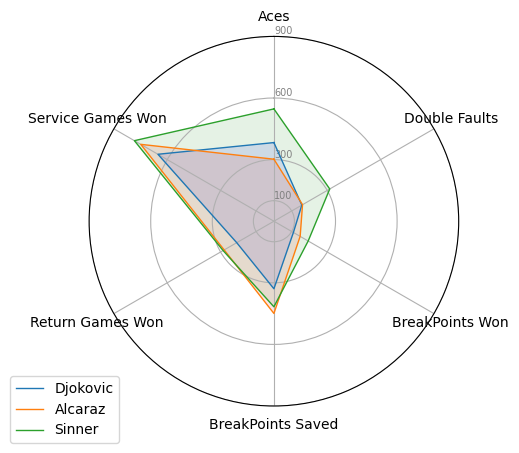

In [88]:
from math import pi

dfStats_values = dfStats[["Player Name","Aces", "Double Faults","BreakPoints Won", "BreakPoints Saved", "Return Games Won", "Service Games Won"]]

# number of variable
categories=list(dfStats_values)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, projection="polar")
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([100,300,600, 900], ["100","300","600", "900"], color="grey", size=7)
plt.ylim(0,900)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=dfStats_values.loc[0].drop('Player Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Djokovic")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=dfStats_values.loc[1].drop('Player Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Alcaraz")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=dfStats_values.loc[2].drop('Player Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Sinner")
ax.fill(angles, values, 'g', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()